In [1]:
%load_ext nb_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use("seaborn")

<IPython.core.display.Javascript object>

# Background

Data source:
https://www.kaggle.com/kyr7plus/emg-4

This data was taken from the Myo armband. An array of 8 Electromyography (EMG) sensors worn around arm. 


<div>
<img src="myo-on-arm-wave.jpg" width="500"/>
</div>

The question is, can we use the data from these sensors to determine the gesture the user is holding their hand in. For this experiment we are trying to recognize these 4 gestures: rock, paper, scsisors like the game and the "okay" hand sign. See the image below for refference.

<div>
<img src="paper-rock-scissors-ok-01.jpg" width="300"/>


The purpose of this model would be to use it as part of a system to control a prosthetic or robotic arm as seen in the video below.

In [8]:
from IPython.display import IFrame

IFrame(width="600", height="400", src="https://www.youtube.com/embed/xKUn0-Bhb7U")


In [3]:
#Each of the gestures is in it's own file lets take a look at what one of them looks like.
test_data = pd.read_csv('gestures/0.csv')
test_data.head()



,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0.3,8.0.1,5.0.1,4.0.4,-7.0.1,-59.0,16.0,0
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0


<IPython.core.display.Javascript object>

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   26.0     2909 non-null   float64
 1   4.0      2909 non-null   float64
 2   5.0      2909 non-null   float64
 3   8.0      2909 non-null   float64
 4   -1.0     2909 non-null   float64
 5   -13.0    2909 non-null   float64
 6   -109.0   2909 non-null   float64
 7   -66.0    2909 non-null   float64
 8   -9.0     2909 non-null   float64
 9   2.0      2909 non-null   float64
 10  4.0.1    2909 non-null   float64
 11  13.0     2909 non-null   float64
 12  -18.0    2909 non-null   float64
 13  -30.0    2909 non-null   float64
 14  -119.0   2909 non-null   float64
 15  -45.0    2909 non-null   float64
 16  17.0     2909 non-null   float64
 17  6.0      2909 non-null   float64
 18  -1.0.1   2909 non-null   float64
 19  -9.0.1   2909 non-null   float64
 20  27.0     2909 non-null   float64
 21  20.0     2909 

<IPython.core.display.Javascript object>

In [5]:
# Here we are creating labels for the each of the 64 columns.
# Since there are 8 observations from the 8 sensors in sequence
# we will label the columns as follows observationN_XM with N representing the observation
# number and M representing the sensor number.
features = ["observation" + str(i) + "_X" + str(j) for i in range(8) for j in range(8)]

columns = []
columns += features
# Add a label for the last column. This will be the target for our classifier model
columns.append("target_gesture")
# Set up a test dataFrame with column labels
pd.read_csv("gestures/0.csv", names=columns, index_col=False)

,observation0_X0,observation0_X1,observation0_X2,observation0_X3,observation0_X4,observation0_X5,observation0_X6,observation0_X7,observation1_X0,observation1_X1,...,observation6_X7,observation7_X0,observation7_X1,observation7_X2,observation7_X3,observation7_X4,observation7_X5,observation7_X6,observation7_X7,target_gesture
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,-12.0,0.0,0.0,-7.0,-4.0,-3.0,-1.0,-5.0,4.0,-1.0,...,12.0,-3.0,0.0,2.0,-1.0,-1.0,4.0,-30.0,-20.0,0
2906,-9.0,-1.0,-2.0,1.0,-13.0,-14.0,-59.0,-4.0,-9.0,0.0,...,20.0,-4.0,0.0,0.0,0.0,-21.0,-10.0,-14.0,-29.0,0
2907,3.0,-2.0,-2.0,4.0,18.0,-5.0,-31.0,7.0,-3.0,-3.0,...,34.0,-7.0,4.0,4.0,2.0,1.0,4.0,-55.0,-4.0,0
2908,-2.0,-2.0,-2.0,1.0,-3.0,-17.0,-33.0,-13.0,3.0,2.0,...,-4.0,0.0,3.0,0.0,5.0,9.0,8.0,-13.0,11.0,0


<IPython.core.display.Javascript object>

In [6]:
# Now we can use the column labels from the above and concatinate the 4 saparate gesture files
# to create a single DataFrame of all our data
gesture_data = pd.read_csv(f"gestures/0.csv", index_col=False, names=columns)
for i in range(1, 4):
    df = pd.read_csv(f"gestures/{i}.csv", index_col=False, names=columns)
    gesture_data = gesture_data.append(df, ignore_index=True)

<IPython.core.display.Javascript object>

In [7]:
gesture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11678 entries, 0 to 11677
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   observation0_X0  11678 non-null  float64
 1   observation0_X1  11678 non-null  float64
 2   observation0_X2  11678 non-null  float64
 3   observation0_X3  11678 non-null  float64
 4   observation0_X4  11678 non-null  float64
 5   observation0_X5  11678 non-null  float64
 6   observation0_X6  11678 non-null  float64
 7   observation0_X7  11678 non-null  float64
 8   observation1_X0  11678 non-null  float64
 9   observation1_X1  11678 non-null  float64
 10  observation1_X2  11678 non-null  float64
 11  observation1_X3  11678 non-null  float64
 12  observation1_X4  11678 non-null  float64
 13  observation1_X5  11678 non-null  float64
 14  observation1_X6  11678 non-null  float64
 15  observation1_X7  11678 non-null  float64
 16  observation2_X0  11678 non-null  float64
 17  observation2

<IPython.core.display.Javascript object>

# Data Exploration

In [8]:
# It looks like all our data is correctly formatted with no missing values.
# Lets look at some summary statistics
gesture_data.describe()

,observation0_X0,observation0_X1,observation0_X2,observation0_X3,observation0_X4,observation0_X5,observation0_X6,observation0_X7,observation1_X0,observation1_X1,...,observation6_X7,observation7_X0,observation7_X1,observation7_X2,observation7_X3,observation7_X4,observation7_X5,observation7_X6,observation7_X7,target_gesture
count,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,...,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000
mean,-0.520380,-0.726837,-0.739082,-0.729748,-0.159103,-0.554890,-1.272649,-0.661843,-0.665953,-0.654222,...,-0.932694,-0.836958,-0.740623,-0.768710,-0.705343,-0.146686,-0.374807,-1.449306,-0.609094,1.503254
std,18.566709,11.766878,4.989944,7.441675,17.850402,25.809528,25.089972,15.408896,18.123854,11.841260,...,15.158993,18.204465,12.005206,4.969758,7.384410,17.841479,25.551082,25.259736,15.530091,1.117541
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-116.000000,-128.000000,-46.000000,-74.000000,-103.000000,-128.000000,-128.000000,-124.000000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,...,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000,1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,7.000000,3.000000,2.000000,3.000000,10.000000,13.000000,4.000000,6.000000,6.000000,3.000000,...,6.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.000000,3.000000
max,111.000000,90.000000,34.000000,55.000000,92.000000,127.000000,127.000000,126.000000,127.000000,106.000000,...,114.000000,127.000000,105.000000,29.000000,51.000000,110.000000,127.000000,127.000000,127.000000,3.000000


<IPython.core.display.Javascript object>

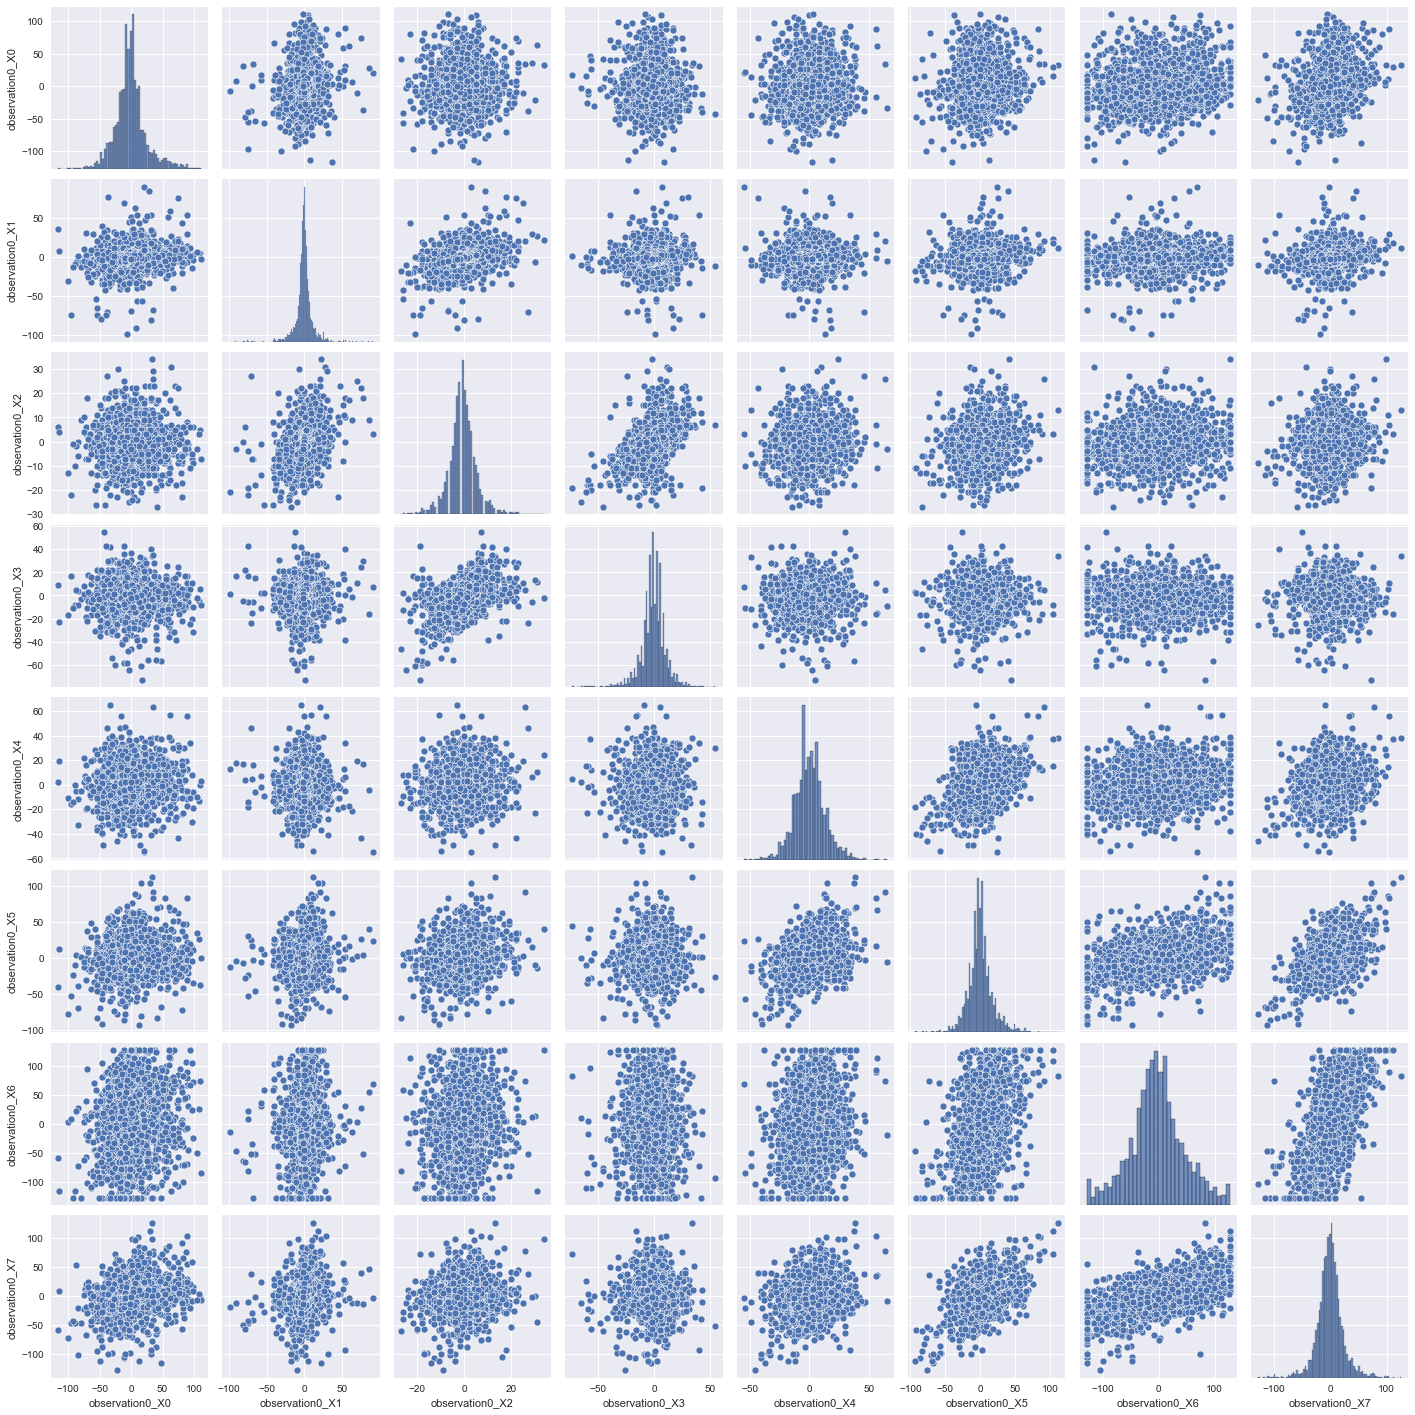

<IPython.core.display.Javascript object>

In [9]:
# Lets look a pair plot to check for correlation between features
sns.pairplot(gesture_data[gesture_data.target_gesture == 0][features[0:8]])
plt.show()

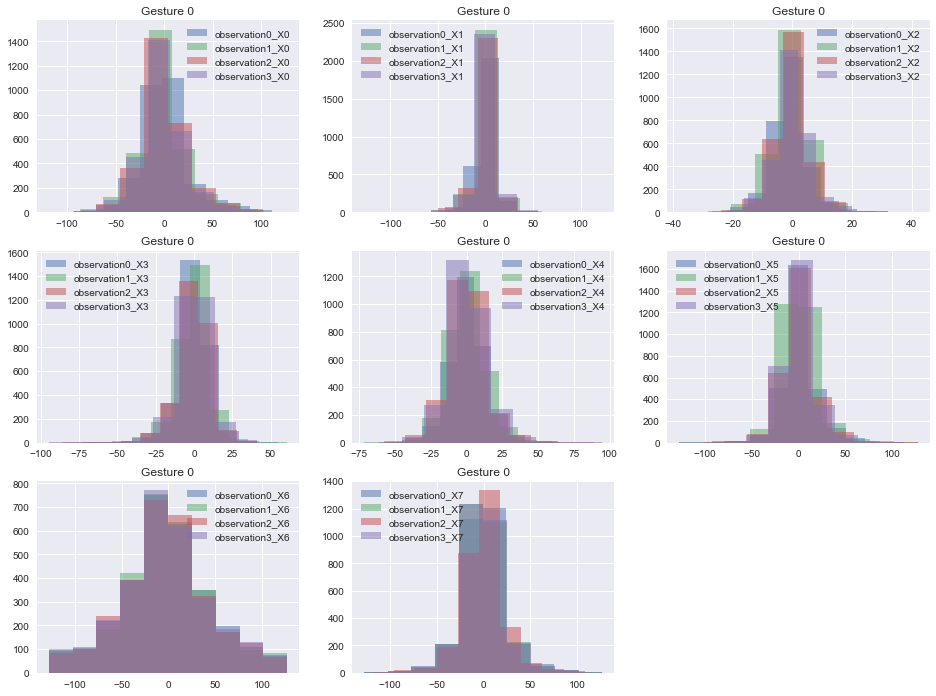

<IPython.core.display.Javascript object>

In [10]:
# In the plots below, I'm looking for variations in the distribution of the different sensors
# For one particular gesture

plt.figure(figsize=(16, 12))
gesture_number = 0
plot_number = 1

for i in range(0, 8):
    legend = []
    plt.subplot(3, 3, plot_number)
    for j in range(0, 32, 8):
        gesture_data[gesture_data.target_gesture == gesture_number][
            features[i + j]
        ].hist(alpha=0.5)
        legend.append(features[i + j])

    plot_number += 1
    plt.legend(legend)
    plt.title(f"Gesture {gesture_number}")


plt.show()

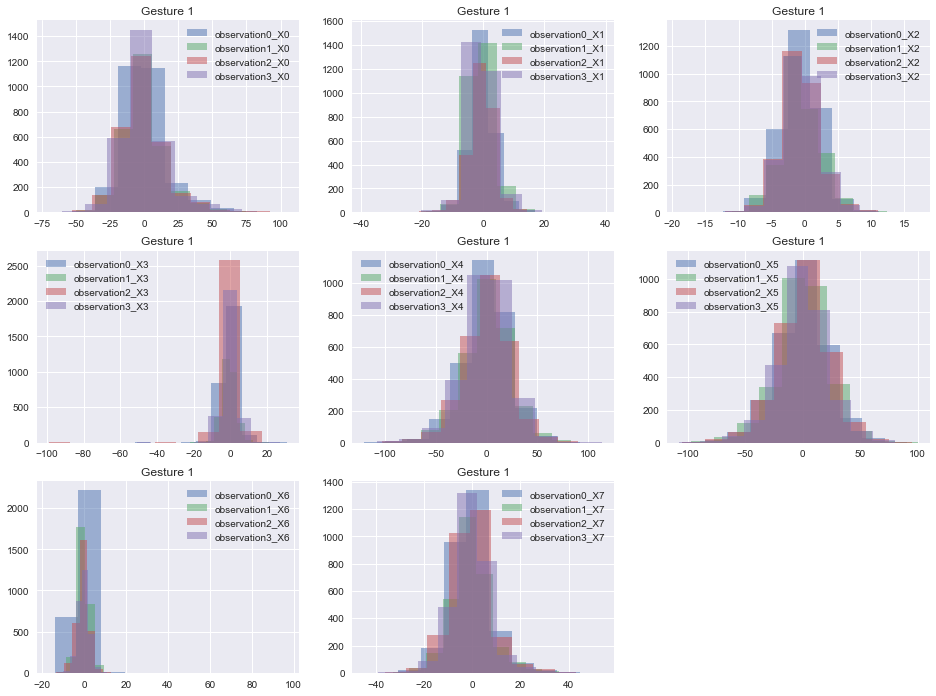

<IPython.core.display.Javascript object>

In [11]:
# Lets look at the same set of distributions for a different gesture

plt.figure(figsize=(16, 12))
gesture_number = 1
plot_number = 1

for i in range(0, 8):
    legend = []
    plt.subplot(3, 3, plot_number)
    for j in range(0, 32, 8):
        gesture_data[gesture_data.target_gesture == gesture_number][
            features[i + j]
        ].hist(alpha=0.5)
        legend.append(features[i + j])

    plot_number += 1
    plt.legend(legend)
    plt.title(f"Gesture {gesture_number}")


plt.show()

In [12]:
# The plots above are noticalbly differnt from the first set so that give me some indication
# that our model could possibly classify the differenet gestures

<IPython.core.display.Javascript object>

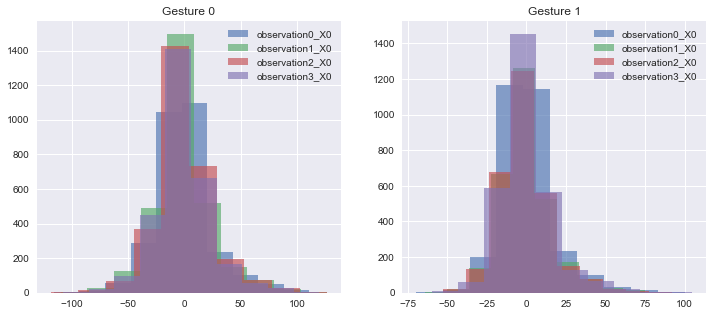

<IPython.core.display.Javascript object>

In [13]:
# lets take a closer look at the distributions from one sensor
def sensor_dist_plot(gesture, sensor):
    legend = []
    obs0 = gesture_data[gesture_data.target_gesture == gesture][
        f"observation0_X{sensor}"
    ]
    obs0.hist(alpha=0.65)
    legend.append(obs0.name)

    obs1 = gesture_data[gesture_data.target_gesture == gesture][
        f"observation1_X{sensor}"
    ]
    obs1.hist(alpha=0.65)
    legend.append(obs1.name)

    obs2 = gesture_data[gesture_data.target_gesture == gesture][
        f"observation2_X{sensor}"
    ]
    obs2.hist(alpha=0.65)
    legend.append(obs2.name)

    obs3 = gesture_data[gesture_data.target_gesture == gesture][
        f"observation3_X{sensor}"
    ]
    obs3.hist(alpha=0.65)
    legend.append(obs3.name)
    plt.legend(legend)
    plt.title(f"Gesture {gesture}")


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sensor_dist_plot(0, 0)
plt.subplot(1, 2, 2)
sensor_dist_plot(1, 0)
plt.show()

In [14]:
# Looking at more summary statistics for specific gestrues and observation sets
gesture_data[gesture_data.target_gesture == 0][features[0:8]].describe()

,observation0_X0,observation0_X1,observation0_X2,observation0_X3,observation0_X4,observation0_X5,observation0_X6,observation0_X7
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,-0.622680,-0.693471,-0.730584,-0.715120,0.076289,0.161856,-2.963230,-0.686598
std,25.581029,11.898513,6.208888,10.840904,12.900192,19.134960,48.548159,23.575177
min,-116.000000,-99.000000,-27.000000,-73.000000,-55.000000,-93.000000,-128.000000,-128.000000
25%,-14.000000,-4.000000,-4.000000,-6.000000,-8.000000,-9.000000,-30.000000,-12.000000
50%,-2.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-4.000000,-1.000000
75%,10.000000,3.000000,2.000000,5.000000,8.000000,8.750000,24.750000,10.000000
max,111.000000,90.000000,34.000000,55.000000,65.000000,112.000000,127.000000,126.000000


<IPython.core.display.Javascript object>

In [15]:
gesture_data[gesture_data.target_gesture == 0][features[8:16]].describe()

,observation1_X0,observation1_X1,observation1_X2,observation1_X3,observation1_X4,observation1_X5,observation1_X6,observation1_X7
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,-0.563574,-0.603436,-0.678694,-0.760481,0.139519,0.281100,-3.249141,-0.767698
std,24.994972,11.728397,6.139844,10.857907,13.232243,19.198928,48.496914,23.530828
min,-110.000000,-128.000000,-36.000000,-66.000000,-72.000000,-128.000000,-128.000000,-128.000000
25%,-14.000000,-4.000000,-4.000000,-6.000000,-8.000000,-9.000000,-30.000000,-12.000000
50%,-2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-4.000000,-1.000000
75%,10.000000,3.000000,2.000000,6.000000,8.000000,9.000000,23.000000,10.000000
max,127.000000,106.000000,42.000000,61.000000,63.000000,127.000000,127.000000,127.000000


<IPython.core.display.Javascript object>

In [16]:
gesture_data[gesture_data.target_gesture == 0][features[0:8]].describe()

,observation0_X0,observation0_X1,observation0_X2,observation0_X3,observation0_X4,observation0_X5,observation0_X6,observation0_X7
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,-0.622680,-0.693471,-0.730584,-0.715120,0.076289,0.161856,-2.963230,-0.686598
std,25.581029,11.898513,6.208888,10.840904,12.900192,19.134960,48.548159,23.575177
min,-116.000000,-99.000000,-27.000000,-73.000000,-55.000000,-93.000000,-128.000000,-128.000000
25%,-14.000000,-4.000000,-4.000000,-6.000000,-8.000000,-9.000000,-30.000000,-12.000000
50%,-2.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-4.000000,-1.000000
75%,10.000000,3.000000,2.000000,5.000000,8.000000,8.750000,24.750000,10.000000
max,111.000000,90.000000,34.000000,55.000000,65.000000,112.000000,127.000000,126.000000


<IPython.core.display.Javascript object>

In [17]:
gesture_data[gesture_data.target_gesture == 1][features[0:8]].describe()

,observation0_X0,observation0_X1,observation0_X2,observation0_X3,observation0_X4,observation0_X5,observation0_X6,observation0_X7
count,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000
mean,0.105753,-0.657940,-0.723390,-0.686531,-0.450224,-0.572167,-0.674475,-0.694798
std,16.592249,4.186854,2.858294,4.013706,22.772952,22.570302,3.247720,8.109935
min,-70.000000,-29.000000,-19.000000,-52.000000,-121.000000,-105.000000,-14.000000,-40.000000
25%,-10.000000,-3.000000,-2.000000,-3.000000,-13.000000,-13.000000,-2.000000,-5.000000
50%,-2.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
75%,7.000000,2.000000,1.000000,2.000000,14.000000,14.000000,1.000000,3.000000
max,100.000000,22.000000,14.000000,31.000000,92.000000,91.000000,97.000000,54.000000


<IPython.core.display.Javascript object>

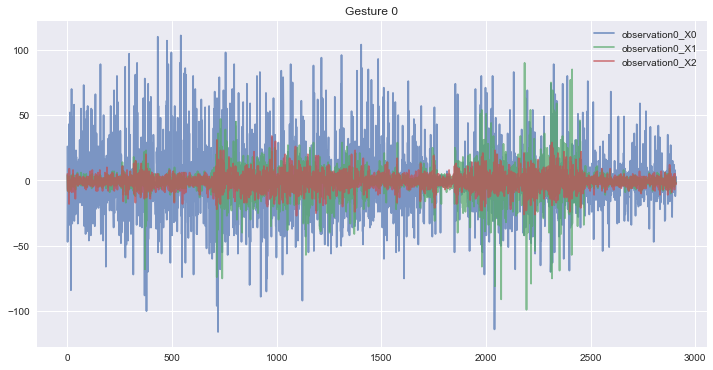

<IPython.core.display.Javascript object>

In [18]:
# A look at how the signals vary over time
gesture_data[gesture_data.target_gesture == 0][features[0:3]].plot(
    alpha=0.7, figsize=(12, 6)
)
plt.title(f"Gesture {0}")
plt.show()



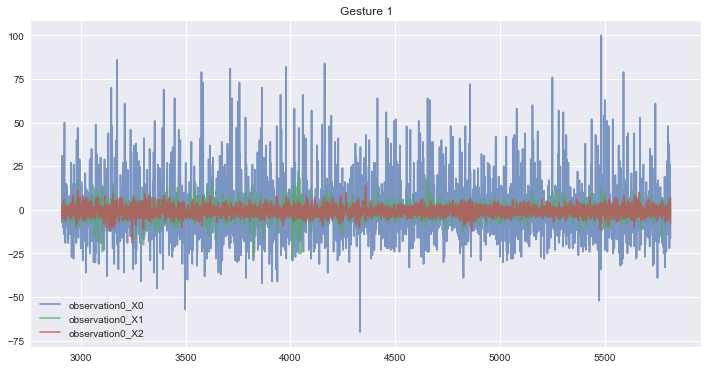

<IPython.core.display.Javascript object>

In [19]:
gesture_data[gesture_data.target_gesture == 1][features[0:3]].plot(
    alpha=0.7, figsize=(12, 6)
)
plt.title(f"Gesture {1}")
plt.show()

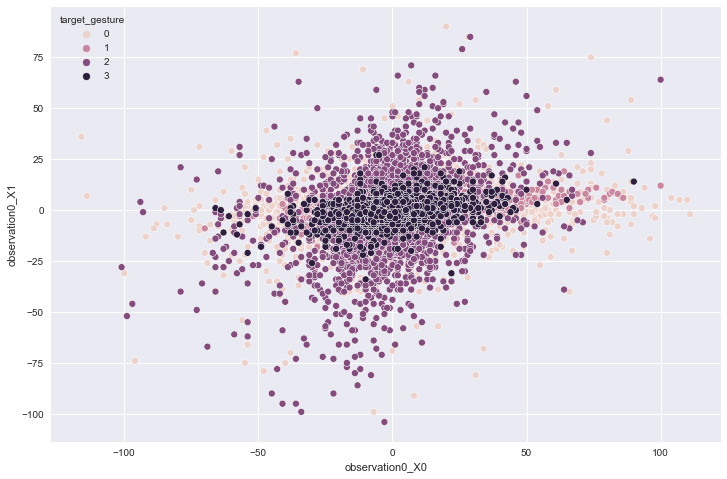

<IPython.core.display.Javascript object>

In [20]:
# a look at some plots of 2 of the sensors plotted agaist each other with colors showing
# the different classes
plt.figure(figsize=[12, 8])
sns.scatterplot(
    data=gesture_data, x="observation0_X0", y="observation0_X1", hue="target_gesture"
)
plt.show()

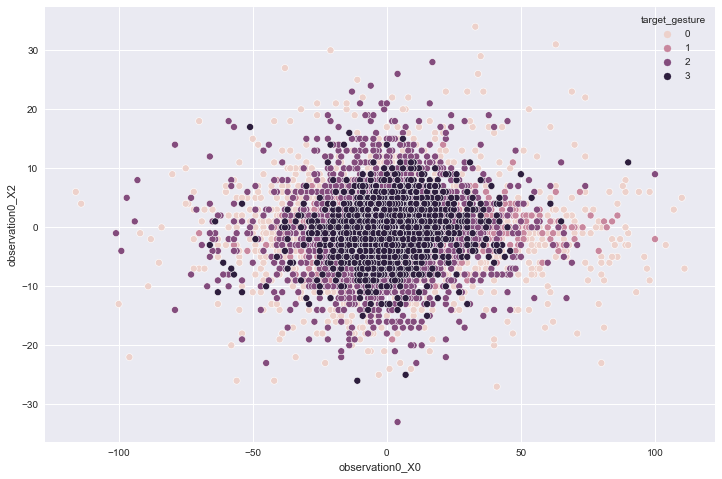

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=[12, 8])
sns.scatterplot(
    data=gesture_data, x="observation0_X0", y="observation0_X2", hue="target_gesture"
)
plt.show()

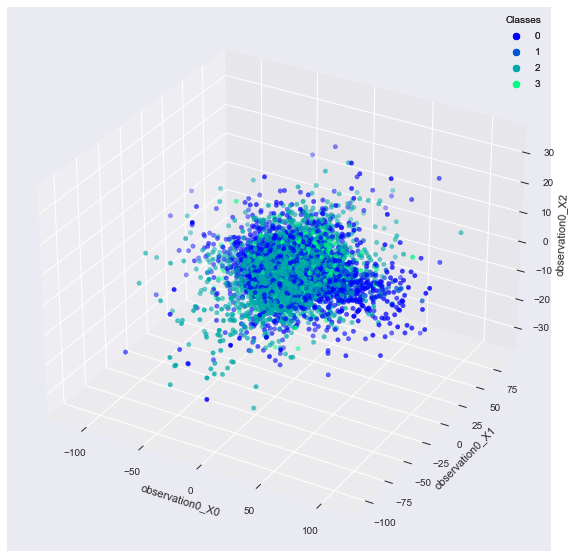

<IPython.core.display.Javascript object>

In [22]:
# and a similar plot for 3 of the sensors
fig = plt.figure(figsize=[13, 10])
ax = fig.gca(projection="3d")
scatter = ax.scatter(
    xs=gesture_data["observation0_X0"],
    ys=gesture_data["observation0_X1"],
    zs=gesture_data["observation0_X2"],
    c=gesture_data["target_gesture"],
    cmap="winter",
)

legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_xlabel("observation0_X0")
ax.set_ylabel("observation0_X1")
ax.set_zlabel("observation0_X2")
plt.show()

# Modeling 
Since our objective is to correctly classify as many of the gestures as possible we will use macro average recall score as our evauation metric

notes
for grig search use `scoring='recall_macro'`
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

for single model scoring use `recall_score(average='macro')`

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [24]:
# split the data into train and test sets
X = gesture_data[features]
y = gesture_data.target_gesture
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=3000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Test report
---------------------
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       592
           1       0.31      0.32      0.31       574
           2       0.28      0.26      0.27       594
           3       0.31      0.36      0.33       576

    accurac

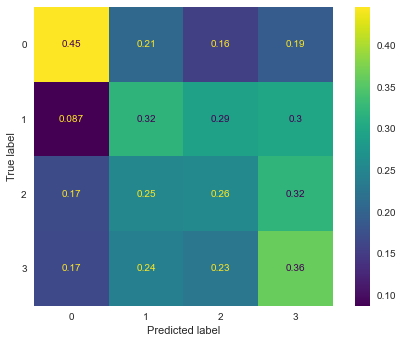

<IPython.core.display.Javascript object>

In [25]:
# I don't expect a logistic regression model to work well but I'm going to try it
# for a baseline of what I expect the worse case to look like
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    plot_confusion_matrix,
    confusion_matrix,
    recall_score,
)

logit = LogisticRegression(max_iter=3000)
# Use a pipline to apply a standard scaler to the data
scale = StandardScaler()
pipe = make_pipeline(scale, logit)

pipe.fit(X_train, y_train)
# I'll be scoring a bunch of models so I'm creating report function to print a
# summary for each model
def model_report(model):

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_score = recall_score(y_train, y_pred_train, average="macro")
    test_score = recall_score(y_test, y_pred_test, average="macro")

    print(model)

    print("Test report")
    print("---------------------")
    print(classification_report(y_test, y_pred_test))
    print(
        f"Train macro average recall {train_score}\n"
        f"Test macro average recall {test_score}\n"
        f"Genreaization error:  {train_score - test_score}"
    )

    plot_confusion_matrix(model, X_test, y_test, normalize="true")
    plt.grid(False)


model_report(pipe)

In [26]:
# It looks like the logistic regression model is underfitting the data
# Lets try some other models

<IPython.core.display.Javascript object>

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)
Test report
---------------------
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       592
           1       0.54      0.95      0.69       574
           2       0.82      0.30      0.44       594
           3       0.61      0.72      0.66       576

    accuracy                           0.66      2336
   macro avg       0.72      0.66      0.64      2336
weighted avg       0.73      0.66      0.64      2336

Train macro average recall 0.7626857816474861
Test mac

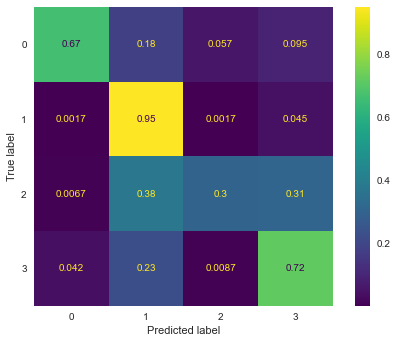

<IPython.core.display.Javascript object>

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
pipe = make_pipeline(scale, knn)
pipe.fit(X_train, y_train)
model_report(pipe)

In [28]:
# The KNN model performed much better than the logistic regression model but lets see if
# we can do better

<IPython.core.display.Javascript object>

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=20,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0

,Importance
observation7_X6,0.072117
observation5_X6,0.071395
observation0_X6,0.068166
observation1_X6,0.068135
observation6_X6,0.061817
observation4_X6,0.060677
observation3_X6,0.060511
observation2_X6,0.055294
observation1_X1,0.042537
observation6_X1,0.034244


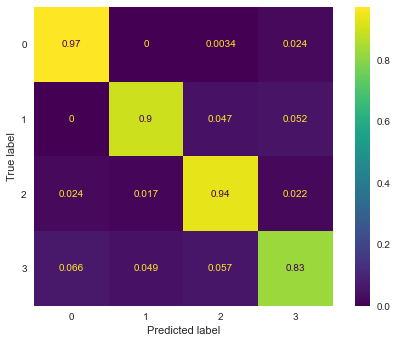

<IPython.core.display.Javascript object>

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(min_samples_split=20)
pipe = make_pipeline(scale, rfc)
pipe.fit(X_train, y_train)
model_report(pipe)

pd.DataFrame(
    pipe[-1].feature_importances_, index=X_train.columns, columns=["Importance"]
).sort_values("Importance", ascending=False).head(10)

In [30]:
# Over 0.90 for the test set with the random forrest model looks very promising
# looking at the feature importance in the randomforest model it looks like all the
# most important information is coming from one sensor, X6.
# lets try a few more models

<IPython.core.display.Javascript object>

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Test report
---------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       592
           1       0.85      0.99      0.91       574
           2       0.93      0.85      0.89       594
           3       0.85      0.83      0.84       576

    accuracy                           0.89      2336
   macro avg       0.89      0.89      0.89      2336
weighted avg       0.89      0.89      0.89      2336

Train ma

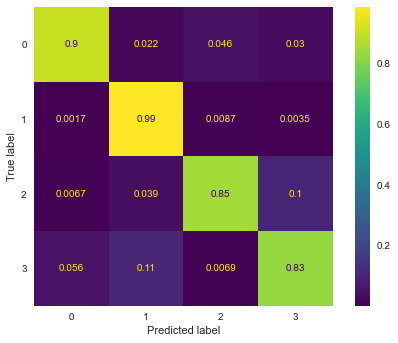

<IPython.core.display.Javascript object>

In [31]:
from sklearn.svm import SVC

svc = SVC()

pipe = make_pipeline(scale, svc)
pipe.fit(X_train, y_train)
model_report(pipe)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=20,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no

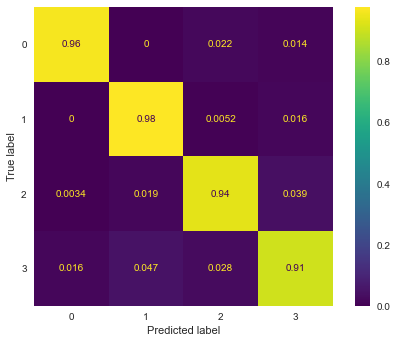

<IPython.core.display.Javascript object>

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(min_samples_split=20)

pipe = make_pipeline(scale, gbc)

pipe.fit(X_train, y_train)
model_report(pipe)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=0.2, n_estimators=1000,
                                    random_state=None))],
         verbose=False)
Test report
---------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       592
           1       0.88      0.93      0.90       574
           2       0.90      0.92      0.91       594
           3       0.80      0.84      0.82       576

    accuracy                           0.89      2336
   macro avg       0.89      0.89      0.89      2336
weighted avg       0.89      0.89      0.89      2336

Train macro average recall 0.8989129790919236
Test macro average recall 0.8886121815809316
Genreaization error:  0.0103007975

,Importance
observation6_X6,0.078
observation7_X6,0.076
observation4_X6,0.069
observation0_X6,0.060
observation1_X6,0.055
...,...
observation7_X2,0.000
observation2_X7,0.000
observation2_X2,0.000
observation0_X2,0.000


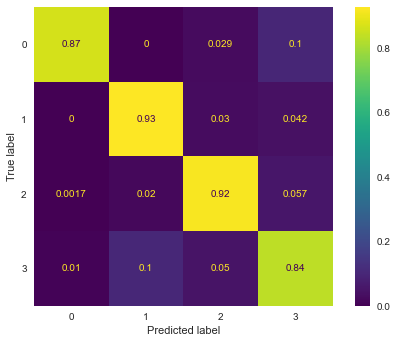

<IPython.core.display.Javascript object>

In [33]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(learning_rate=0.2, n_estimators=1000)

pipe = make_pipeline(scale, abc)
pipe.fit(X_train, y_train)

model_report(pipe)

pd.DataFrame(
    pipe[-1].feature_importances_, index=X_train.columns, columns=["Importance"]
).sort_values("Importance", ascending=False)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',

,Importance
observation4_X6,0.066308
observation7_X6,0.061645
observation0_X6,0.055390
observation1_X6,0.052496
observation4_X1,0.044602
observation5_X6,0.044573
observation1_X1,0.043096
observation6_X6,0.041361
observation3_X6,0.038206
observation7_X1,0.037766


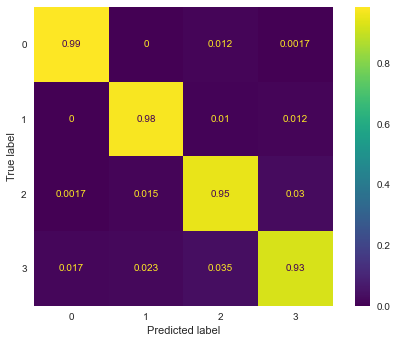

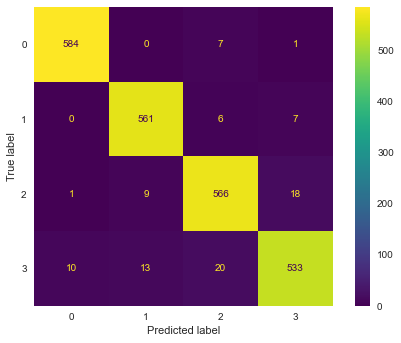

<IPython.core.display.Javascript object>

In [34]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

pipe = make_pipeline(scale, xgbc)
pipe.fit(X_train, y_train)

model_report(pipe)

plot_confusion_matrix(pipe, X_test, y_test, values_format="d")
plt.grid(False)

pd.DataFrame(
    pipe[-1].feature_importances_, index=X_train.columns, columns=["Importance"]
).sort_values("Importance", ascending=False).head(10)

# Parmeter Tuning
The XGBoost model had the best macro average recal score out of all the models I tested so I selected that as the model I will try to improve. It's possibly the XGBoost model just has better default settings but I don't have time to tune every model for this project so I just went with the one with the best initial score. The challence will be whether the score of 0.96 for the test set can be imporved on. 

[0]	validation_0-merror:0.20077
Will train until validation_0-merror hasn't improved in 25 rounds.
[1]	validation_0-merror:0.14855
[2]	validation_0-merror:0.11986
[3]	validation_0-merror:0.11045
[4]	validation_0-merror:0.09461
[5]	validation_0-merror:0.08733
[6]	validation_0-merror:0.08818
[7]	validation_0-merror:0.08305
[8]	validation_0-merror:0.07877
[9]	validation_0-merror:0.07663
[10]	validation_0-merror:0.07834
[11]	validation_0-merror:0.07149
[12]	validation_0-merror:0.07149
[13]	validation_0-merror:0.06592
[14]	validation_0-merror:0.06507
[15]	validation_0-merror:0.06849
[16]	validation_0-merror:0.06336
[17]	validation_0-merror:0.06164
[18]	validation_0-merror:0.06079
[19]	validation_0-merror:0.06164
[20]	validation_0-merror:0.06164
[21]	validation_0-merror:0.05522
[22]	validation_0-merror:0.05480
[23]	validation_0-merror:0.05437
[24]	validation_0-merror:0.05480
[25]	validation_0-merror:0.05223
[26]	validation_0-merror:0.05223
[27]	validation_0-merror:0.05180
[28]	validation_0-m

,Importance
observation4_X6,0.065980
observation7_X6,0.062463
observation0_X6,0.054870
observation1_X6,0.052193
observation4_X1,0.044741
observation5_X6,0.044125
observation1_X1,0.042839
observation6_X6,0.040785
observation7_X1,0.038103
observation3_X6,0.038019


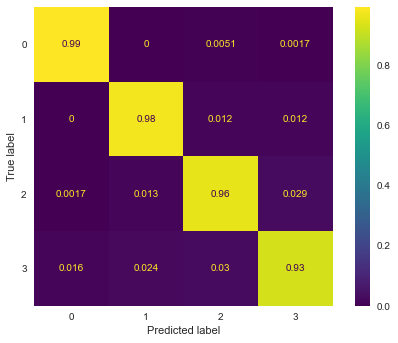

<IPython.core.display.Javascript object>

In [35]:
# lets see if we can reduce overfitting by implementing early stopping
xgbc = XGBClassifier(n_estimators=1000, n_jobs=-1)
xgbc.fit(X_train, y_train, early_stopping_rounds=25, eval_set=[(X_test, y_test)])
model_report(xgbc)

pd.DataFrame(
    xgbc.feature_importances_, index=X_train.columns, columns=["Importance"]
).sort_values("Importance", ascending=False).head(10)

In [36]:
# We will use the best value from early stopping for future models
n_trees = xgbc.best_ntree_limit

<IPython.core.display.Javascript object>

{'scale': ['passthrough', StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1))]}
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   23.5s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   32.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
  

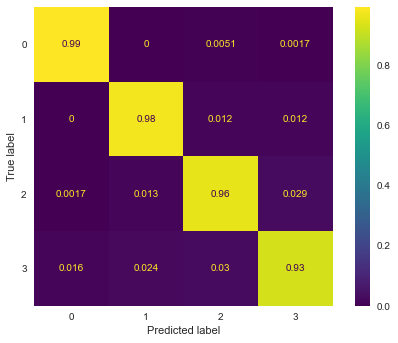

<IPython.core.display.Javascript object>

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# the first thing I wanted to check was wether scaling the data had an effect on the accuracy
# so I did grid search to compare a standard scaler min-max scaler and an unscaled version
xgbc = XGBClassifier(n_estimators=n_trees)
scale = StandardScaler()

pipe = Pipeline([("scale", scale), ("clf", xgbc)])

param_grid = {"scale": ["passthrough", StandardScaler(), MinMaxScaler()]}
print(param_grid)

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=3,
    scoring="recall_macro",
    return_train_score=True,
    n_jobs=-1,
    verbose=True,
)

grid.fit(X_train, y_train)
model_report(grid)

In [38]:
grid.best_params_

{'scale': 'passthrough'}

<IPython.core.display.Javascript object>

In [39]:
# Based on the grid search it looks like scaling was not necessary so we will
# skip it going forward

<IPython.core.display.Javascript object>

In [40]:
grid.cv_results_

{'mean_fit_time': array([20.58957362, 20.58945497, 16.47588833]),
 'std_fit_time': array([0.11805556, 0.11397068, 5.65072791]),
 'mean_score_time': array([0.13193607, 0.11980955, 0.12004383]),
 'std_score_time': array([0.00256008, 0.00300411, 0.03471935]),
 'param_scale': masked_array(data=['passthrough',
                    StandardScaler(copy=True, with_mean=True, with_std=True),
                    MinMaxScaler(copy=True, feature_range=(0, 1))],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'scale': 'passthrough'},
  {'scale': StandardScaler(copy=True, with_mean=True, with_std=True)},
  {'scale': MinMaxScaler(copy=True, feature_range=(0, 1))}],
 'split0_test_score': array([0.95805985, 0.95805985, 0.95805985]),
 'split1_test_score': array([0.94972298, 0.94972298, 0.94972298]),
 'split2_test_score': array([0.95484056, 0.95484056, 0.95484056]),
 'mean_test_score': array([0.9542078, 0.9542078, 0.9542078]),
 'std_test_score': a

<IPython.core.display.Javascript object>

In [41]:
# I was also interested wanted to know if any of the grid search params could
# reduce overfitting so I created this funtion to calculate the average generalization error
# for differnt grid parameters
def grid_train_test_diffs(grid):
    train_test_diffs = []
    for j in range(len(grid.cv_results_["params"])):
        difs = []
        for i in range(grid.cv):
            dif = (
                grid.cv_results_[f"split{i}_train_score"][j]
                - grid.cv_results_[f"split{i}_test_score"][j]
            )
            difs.append(dif)
        train_test_diffs.append(np.mean(difs))
    return train_test_diffs


grid_train_test_diffs(grid)

[0.04579220300085688, 0.04579220300085688, 0.04579220300085688]

<IPython.core.display.Javascript object>

In [42]:
# It looks like the different scalers had little effect on the generalization error either

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   30.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   30.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
       

,Importance
observation4_X6,0.064682
observation7_X6,0.061001
observation1_X6,0.052473
observation0_X6,0.049878
observation4_X1,0.044631
...,...
observation1_X7,0.003049
observation0_X7,0.002947
observation2_X7,0.002751
observation5_X7,0.002629


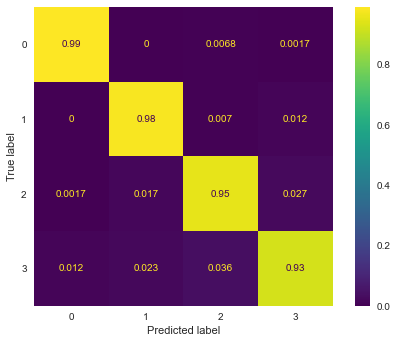

<IPython.core.display.Javascript object>

In [43]:
# lest try varying gamma which controlls the minimum loss reduction required
# to make a further partition on a leaf node of the tree. Default value is 0
# mabe this will help with overfitting.

xgbc = XGBClassifier(n_estimators=n_trees)

param_grid = {"gamma": [0, 0.01, 0.1, 0.5]}

grid = GridSearchCV(
    xgbc,
    param_grid,
    cv=3,
    scoring="recall_macro",
    return_train_score=True,
    n_jobs=-1,
    verbose=True,
)
grid.fit(X_train, y_train)

model_report(grid)

pd.DataFrame(
    grid.best_estimator_.feature_importances_,
    index=X_train.columns,
    columns=["Importance"],
).sort_values("Importance", ascending=False)

In [44]:
grid.best_params_

{'gamma': 0.1}

<IPython.core.display.Javascript object>

In [45]:
best_gamma = grid.best_params_["gamma"]

<IPython.core.display.Javascript object>

In [46]:
grid_train_test_diffs(grid)

[0.04579220300085688,
 0.04419690611795509,
 0.043401026486590534,
 0.0463833437379206]

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   56.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estima...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
       

,Importance
observation4_X6,0.064682
observation7_X6,0.061001
observation1_X6,0.052473
observation0_X6,0.049878
observation4_X1,0.044631
...,...
observation1_X7,0.003049
observation0_X7,0.002947
observation2_X7,0.002751
observation5_X7,0.002629


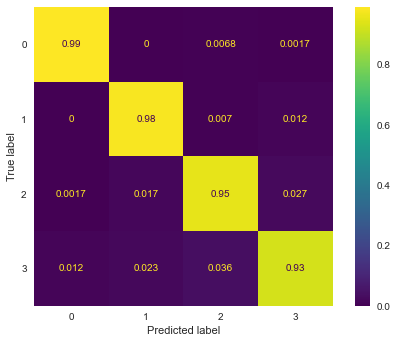

<IPython.core.display.Javascript object>

In [47]:
# lets try varying the amount of l2 regularization
xgbc = XGBClassifier(n_estimators=n_trees, gamma=best_gamma)

param_grid = {"reg_lambda": [0.01, 0.1, 1, 10, 20, 50]}

grid = GridSearchCV(
    xgbc,
    param_grid,
    cv=3,
    scoring="recall_macro",
    return_train_score=True,
    n_jobs=-1,
    verbose=True,
)
grid.fit(X_train, y_train)

model_report(grid)

pd.DataFrame(
    grid.best_estimator_.feature_importances_,
    index=X_train.columns,
    columns=["Importance"],
).sort_values("Importance", ascending=False)

In [48]:
print(grid.best_params_)
grid_train_test_diffs(grid)

{'reg_lambda': 1}


[0.04644507725304303,
 0.04558817584854902,
 0.043401026486590534,
 0.04436314566346985,
 0.04688334561932402,
 0.044002732185435746]

<IPython.core.display.Javascript object>

In [49]:
best_lambda = grid.best_params_["reg_lambda"]

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   53.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estima...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=1, scale_pos_weight=None,
          

,Importance
observation4_X6,0.064682
observation7_X6,0.061001
observation1_X6,0.052473
observation0_X6,0.049878
observation4_X1,0.044631
...,...
observation1_X7,0.003049
observation0_X7,0.002947
observation2_X7,0.002751
observation5_X7,0.002629


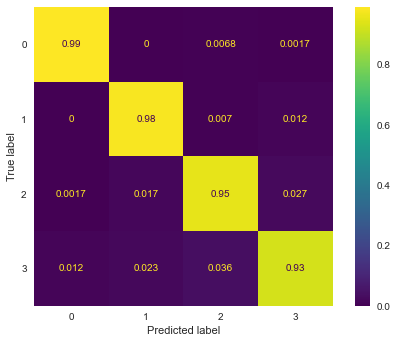

<IPython.core.display.Javascript object>

In [50]:
# lets try changing the max depth of the trees (default: 6)
xgbc = XGBClassifier(n_estimators=n_trees, gamma=best_gamma, reg_lambda=best_lambda)

param_grid = {"max_depth": [2, 4, 6, 8, 10]}

grid = GridSearchCV(
    xgbc,
    param_grid,
    cv=3,
    scoring="recall_macro",
    return_train_score=True,
    n_jobs=-1,
    verbose=True,
)
grid.fit(X_train, y_train)

model_report(grid)

pd.DataFrame(
    grid.best_estimator_.feature_importances_,
    index=X_train.columns,
    columns=["Importance"],
).sort_values("Importance", ascending=False)

In [51]:
print(grid.best_params_)
grid_train_test_diffs(grid)

{'max_depth': 6}


[0.02676526565263841,
 0.04228731432274687,
 0.043401026486590534,
 0.048047212468037705,
 0.048477060661182514]

<IPython.core.display.Javascript object>

In [52]:
# looks like the default value of 6 is still the best

<IPython.core.display.Javascript object>

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=71, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Test report
---------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.96      0.98      0.97       574
           2       0.95      0.95      0.95       594
           3       0.96      0.93      0.94       576

    accuracy                           0.96      2336
   macro av

,Importance
observation4_X6,0.064682
observation7_X6,0.061001
observation1_X6,0.052473
observation0_X6,0.049878
observation4_X1,0.044631
observation5_X6,0.043028
observation7_X1,0.040551
observation1_X1,0.039494
observation6_X6,0.038912
observation0_X1,0.036946


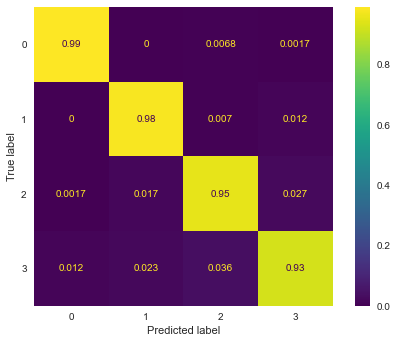

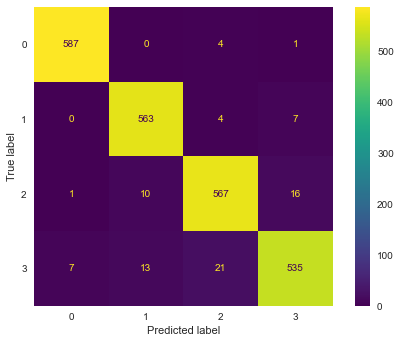

<IPython.core.display.Javascript object>

In [57]:
# Lets take a look at our final model
xgbc = XGBClassifier(
    n_estimators=n_trees, gamma=best_gamma, reg_lambda=best_lambda, n_jobs=-1
)
xgbc.fit(X_train, y_train)
model_report(xgbc)

plot_confusion_matrix(xgbc, X_test, y_test, values_format="d")
plt.grid(False)

pd.DataFrame(
    xgbc.feature_importances_, index=X_train.columns, columns=["Importance"]
).sort_values("Importance", ascending=False).head(10)

# Conclusions and next steps
There are more parameters that I didn't have enought time to tune but I was able to imporve the macro average recall for the test set from 0.96 to 0.964
Another things I'd like to do if I had more time is try out a model with a subset of features. Sensor X6 consistenly came up in the top of the feature importance list so it would be interesting to try a model with just the top ten most important features.

If I had acess to a Myo armband and a robot arm I would try to implement the rest of the control system. 